In [14]:
import pandas as pd
import numpy as np
import sys
import optuna

sys.path.append('..')

from source.utils import read_data, handle_nans, preprocess

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import category_encoders as ce
                            
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier, plot_importance

In [2]:
train, test, sub = read_data()

In [3]:
train = train.drop(['user_id', 'MRG'], axis=1)
test = test.drop(['user_id', 'MRG'], axis=1)

train, test = handle_nans(preprocess(train), preprocess(test))

In [4]:
train['diff'] = train['REVENUE'] - train['ARPU_SEGMENT'] * 3
test['diff'] = test['REVENUE'] - test['ARPU_SEGMENT'] * 3

train = train.drop(['FREQUENCE_RECH_isna', 'FREQUENCE_isna', 'ARPU_SEGMENT'], axis=1)
test = test.drop(['FREQUENCE_RECH_isna', 'FREQUENCE_isna', 'ARPU_SEGMENT'], axis=1)

In [6]:
target = 'CHURN'
categorical_columns = [
    'REGION', 'TENURE', 'keyword', 'MONTANT_isna', 'REVENUE_isna',
    'DATA_VOLUME_isna', 'ON_NET_isna', 'ORANGE_isna', 'TIGO_isna',
    'ZONE1_isna', 'ZONE2_isna', 'FREQ_TOP_PACK_isna', 'F_isna', 'size_isna',
    'duration_isna'
]

train['nan_sum'] = train[categorical_columns[3:]].sum(1) + (train[['REGION', 'TENURE', 'keyword']]=='NAN').sum(1)
test['nan_sum'] = test[categorical_columns[3:]].sum(1) + (test[['REGION', 'TENURE', 'keyword']]=='NAN').sum(1)

Trial 1 finished with value: 0.9312603092027365 and parameters: {'REGION_encoder': <class 'category_encoders.woe.WOEEncoder'>, 'TENURE_encoder': <class 'category_encoders.cat_boost.CatBoostEncoder'>, 'keyword_encoder': <class 'category_encoders.polynomial.PolynomialEncoder'>}. Best is trial 1 with value: 0.93126

In [163]:
# numerical_columns = train.columns.difference(categorical_columns + [target, 'diff'])

# train[['log_' + col for col in numerical_columns]] = np.log1p(train[numerical_columns])
# test[['log_' + col for col in numerical_columns]] = np.log1p(test[numerical_columns])



In [25]:
train_data, val_data, y_train, y_val = train_test_split(train.drop(target, axis=1), train[target], random_state=42)

# enc = ce.JamesSteinEncoder()

# train_data[categorical_columns] = enc.fit_transform(train_data[categorical_columns], y_train)
# val_data[categorical_columns] = enc.transform(val_data[categorical_columns])

In [26]:
lgbm = CatBoostClassifier(iterations=100, max_depth=4)

lgbm.fit(train_data, y_train, cat_features=['REGION', 'TENURE', 'keyword'])
roc_auc_score(y_val, lgbm.predict_proba(val_data)[:, 1])

Learning rate set to 0.5
0:	learn: 0.3567305	total: 647ms	remaining: 1m 4s
1:	learn: 0.2742522	total: 1.42s	remaining: 1m 9s
2:	learn: 0.2612607	total: 1.97s	remaining: 1m 3s
3:	learn: 0.2581240	total: 2.51s	remaining: 1m
4:	learn: 0.2570239	total: 2.97s	remaining: 56.4s
5:	learn: 0.2563846	total: 3.47s	remaining: 54.4s
6:	learn: 0.2559257	total: 4.1s	remaining: 54.4s
7:	learn: 0.2555774	total: 4.63s	remaining: 53.3s
8:	learn: 0.2554106	total: 5.12s	remaining: 51.8s
9:	learn: 0.2545352	total: 5.65s	remaining: 50.8s
10:	learn: 0.2541747	total: 6.15s	remaining: 49.7s
11:	learn: 0.2539929	total: 6.68s	remaining: 49s
12:	learn: 0.2539027	total: 7.15s	remaining: 47.9s
13:	learn: 0.2537657	total: 7.64s	remaining: 46.9s
14:	learn: 0.2535956	total: 8.12s	remaining: 46s
15:	learn: 0.2534581	total: 8.82s	remaining: 46.3s
16:	learn: 0.2533214	total: 9.36s	remaining: 45.7s
17:	learn: 0.2531185	total: 9.98s	remaining: 45.4s
18:	learn: 0.2529699	total: 10.5s	remaining: 44.7s
19:	learn: 0.2529271	tot

0.9312328457516097

In [24]:
lgbm = CatBoostClassifier(iterations=100, max_depth=4)

lgbm.fit(train_data, y_train)
roc_auc_score(y_val, lgbm.predict_proba(val_data)[:, 1])

Learning rate set to 0.5
0:	learn: 0.3044831	total: 420ms	remaining: 41.6s
1:	learn: 0.2668272	total: 799ms	remaining: 39.1s
2:	learn: 0.2587285	total: 1.17s	remaining: 37.8s
3:	learn: 0.2568766	total: 1.5s	remaining: 36s
4:	learn: 0.2560820	total: 1.82s	remaining: 34.6s
5:	learn: 0.2556122	total: 2.14s	remaining: 33.5s
6:	learn: 0.2544789	total: 2.47s	remaining: 32.8s
7:	learn: 0.2542557	total: 2.77s	remaining: 31.9s
8:	learn: 0.2539795	total: 3.09s	remaining: 31.2s
9:	learn: 0.2538137	total: 3.4s	remaining: 30.6s
10:	learn: 0.2536854	total: 3.72s	remaining: 30.1s
11:	learn: 0.2534626	total: 4.05s	remaining: 29.7s
12:	learn: 0.2533445	total: 4.38s	remaining: 29.3s
13:	learn: 0.2532580	total: 4.69s	remaining: 28.8s
14:	learn: 0.2531531	total: 4.99s	remaining: 28.3s
15:	learn: 0.2530221	total: 5.32s	remaining: 27.9s
16:	learn: 0.2528209	total: 5.67s	remaining: 27.7s
17:	learn: 0.2527579	total: 5.99s	remaining: 27.3s
18:	learn: 0.2526845	total: 6.31s	remaining: 26.9s
19:	learn: 0.2526634

0.9312510917440435

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

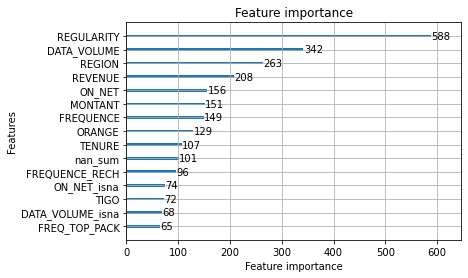

In [243]:
plot_importance(lgbm, max_num_features=15)

In [15]:
def objective(trial):
    model = CatBoostClassifier(iterations=100, verbose=False)

    categorical_names = ['REGION', 'TENURE', 'keyword']
    encoders = []
    
    for feature in categorical_names:
        encoders.append(trial.suggest_categorical(
            f"{feature}_encoder", 
            [
                ce.TargetEncoder, ce.JamesSteinEncoder, ce.CountEncoder,
                ce.SumEncoder, ce.CatBoostEncoder,
                ce.PolynomialEncoder, ce.OrdinalEncoder, ce.WOEEncoder
            ]
        ))
        
    X_train, X_val, y_train, y_val = train_test_split(
        train.drop(target, axis=1),
        train[target],
        random_state=42
    )
    
    for i, feature in enumerate(categorical_names):
        cur = encoders[i]()
        transformed = cur.fit_transform(X_train[feature], y_train)
        new_features = [f'{feature}_{i}' for i in range(transformed.shape[1])]

        X_train[new_features] = transformed

        transformed = cur.transform(X_val[feature])
        X_val[new_features] = transformed

    X_train = X_train.drop(categorical_names, axis=1)
    X_val = X_val.drop(categorical_names, axis=1)

    model.fit(X_train, y_train)

    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    
    return auc

In [16]:
study = optuna.create_study(direction='maximize')  # Create a new study.
study.optimize(objective, n_trials=100, n_jobs=3, show_progress_bar=True)

[I 2021-10-05 19:34:59,011] A new study created in memory with name: no-name-ad9ae5de-fba7-49ac-89e4-6e9c7b2691f5
[I 2021-10-05 19:37:31,798] Trial 1 finished with value: 0.9312470661267822 and parameters: {'REGION_encoder': <class 'category_encoders.target_encoder.TargetEncoder'>, 'TENURE_encoder': <class 'category_encoders.woe.WOEEncoder'>, 'keyword_encoder': <class 'category_encoders.cat_boost.CatBoostEncoder'>}. Best is trial 1 with value: 0.9312470661267822.
[I 2021-10-05 19:37:32,198] Trial 0 finished with value: 0.9313273097062579 and parameters: {'REGION_encoder': <class 'category_encoders.james_stein.JamesSteinEncoder'>, 'TENURE_encoder': <class 'category_encoders.sum_coding.SumEncoder'>, 'keyword_encoder': <class 'category_encoders.target_encoder.TargetEncoder'>}. Best is trial 0 with value: 0.9313273097062579.
[I 2021-10-05 19:37:33,964] Trial 2 finished with value: 0.9312025089572613 and parameters: {'REGION_encoder': <class 'category_encoders.cat_boost.CatBoostEncoder'>, '

KeyboardInterrupt: 

In [223]:
model = LGBMClassifier()

categor_features = ['REGION', 'TENURE', 'keyword']
encoders = [
    ce.TargetEncoder, ce.JamesSteinEncoder, ce.CountEncoder,
    ce.SumEncoder, ce.CatBoostEncoder,
    ce.PolynomialEncoder, ce.OrdinalEncoder, ce.WOEEncoder,
]

total_loss = pd.DataFrame(columns=['name', 'score'])

n_repeat = 10000
was = set()
for it in range(n_repeat):
    enc = tuple(np.random.choice(encoders, size=len(categor_features,)))
    if enc in was:
        continue
    was.add(enc)
    if enc[0] == enc[1] == enc[2]:
        print('kek!')
    
    X_train, X_valid, y_train, y_valid = train_test_split(
        train.drop(target, axis=1),
        train[target],
        random_state=42
    )

    for i, feature in enumerate(categor_features):

        cur = enc[i]()
        transformed = cur.fit_transform(X_train[feature], y_train)
        new_features = [f'{feature}_{i}' for i in range(transformed.shape[1])]

        X_train[new_features] = transformed

        transformed = cur.transform(X_valid[feature])
        X_valid[new_features] = transformed

    X_train = X_train.drop(categor_features, axis=1)
    X_valid = X_valid.drop(categor_features, axis=1)


    model.fit(X_train, y_train)
    valid_pred = model.predict_proba(X_valid)[:, 1]
    loss = roc_auc_score(y_valid, valid_pred)

    coders = str(enc)
    total_loss = total_loss.append({'name': coders, 'score': loss}, ignore_index=True)

    print("AUC SCORE:", total_loss[total_loss.name==coders].score.mean())
    

AUC SCORE: 0.9310669376237128
AUC SCORE: 0.9312110059413546
AUC SCORE: 0.9312074441772318
AUC SCORE: 0.9311245721493079
AUC SCORE: 0.9311920357384849
AUC SCORE: 0.931150875019521
AUC SCORE: 0.9311920357384849
AUC SCORE: 0.931233329943046
AUC SCORE: 0.9311222997452197
AUC SCORE: 0.9311104516372083
AUC SCORE: 0.9311174401561773
AUC SCORE: 0.9311287234531853
AUC SCORE: 0.9312184694758241
AUC SCORE: 0.9311574593007165
AUC SCORE: 0.931085904192325
AUC SCORE: 0.9311062887872272
AUC SCORE: 0.9310417958084468
AUC SCORE: 0.9310488695067343
AUC SCORE: 0.9310418329410767
AUC SCORE: 0.9312254659179254
AUC SCORE: 0.9310928190667922
AUC SCORE: 0.9310873186407903
AUC SCORE: 0.9311937944594766
AUC SCORE: 0.931079246537504
AUC SCORE: 0.9311458896874297
AUC SCORE: 0.9312288773118266
AUC SCORE: 0.9311590459588075
AUC SCORE: 0.9311866393854256
AUC SCORE: 0.9310220461250839
AUC SCORE: 0.9311746451960679
AUC SCORE: 0.9311220494554926
AUC SCORE: 0.9311808906109772
AUC SCORE: 0.931152988780373
AUC SCORE: 0.93

KeyboardInterrupt: 

In [237]:
total_loss.sort_values('score', ascending=False)

,name,score
7,(<class 'category_encoders.polynomial.Polynomi...,0.931233
25,(<class 'category_encoders.count.CountEncoder'...,0.931229
19,(<class 'category_encoders.polynomial.Polynomi...,0.931225
12,(<class 'category_encoders.target_encoder.Targ...,0.931218
1,(<class 'category_encoders.sum_coding.SumEncod...,0.931211
2,(<class 'category_encoders.james_stein.JamesSt...,0.931207
22,(<class 'category_encoders.count.CountEncoder'...,0.931194
6,(<class 'category_encoders.ordinal.OrdinalEnco...,0.931192
4,(<class 'category_encoders.ordinal.OrdinalEnco...,0.931192
27,(<class 'category_encoders.cat_boost.CatBoostE...,0.931187


In [238]:
print(*total_loss.sort_values('score', ascending=False).name.values, sep='\n')

(<class 'category_encoders.polynomial.PolynomialEncoder'>, <class 'category_encoders.cat_boost.CatBoostEncoder'>, <class 'category_encoders.ordinal.OrdinalEncoder'>)
(<class 'category_encoders.count.CountEncoder'>, <class 'category_encoders.cat_boost.CatBoostEncoder'>, <class 'category_encoders.sum_coding.SumEncoder'>)
(<class 'category_encoders.polynomial.PolynomialEncoder'>, <class 'category_encoders.count.CountEncoder'>, <class 'category_encoders.woe.WOEEncoder'>)
(<class 'category_encoders.target_encoder.TargetEncoder'>, <class 'category_encoders.james_stein.JamesSteinEncoder'>, <class 'category_encoders.sum_coding.SumEncoder'>)
(<class 'category_encoders.sum_coding.SumEncoder'>, <class 'category_encoders.sum_coding.SumEncoder'>, <class 'category_encoders.ordinal.OrdinalEncoder'>)
(<class 'category_encoders.james_stein.JamesSteinEncoder'>, <class 'category_encoders.count.CountEncoder'>, <class 'category_encoders.ordinal.OrdinalEncoder'>)
(<class 'category_encoders.count.CountEncode

In [ ]:
def make_transformations(train, target, other=[], drop=True, encoders):
    encoded_features = ['REGION', 'keyword', 'TENURE', 'nan_sum']
#     encoders = [[ce.CountEncoder], 
#                 [ce.CountEncoder],
#                 [ce.CountEncoder],
#                 [ce.CountEncoder],
#                 [ce.CountEncoder]]
    new_train = train.copy()
    new_other = []
    
    if other:
        for inside in other:
            new_other.append(inside.copy())
    
    for feature, encs in zip(encoded_features, encoders):
        for idx, encoder in enumerate(encs):
            enc = encoder()
            transformed = enc.fit_transform(train[feature], target)
            new_features = [f'{feature}_{idx}_{i}' for i in range(transformed.shape[1])]
            new_train[new_features] = transformed

            if other:
                for idx, inside in enumerate(other):
                    transformed = enc.transform(inside[feature])
                    new_other[idx][new_features] = transformed
        
        if drop:
            new_train = new_train.drop(feature, axis=1)
            if other:
                for idx, inside in enumerate(new_other):
                    new_other[idx] = inside.drop(feature, axis=1)
        
    return new_train, new_other